In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import pandas_profiling
import matplotlib  as plt


import numpy
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import statistics as stat

In [2]:
titanic=sns.load_dataset('titanic')

In [3]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [4]:
titanic.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

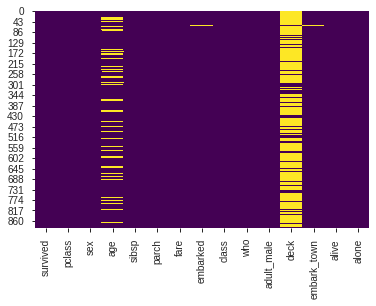

In [6]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [7]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

In [8]:
titanic['deck'].isnull().sum()/titanic.shape[0]*100

77.21661054994388

Text(0.5, 1.0, 'Male')

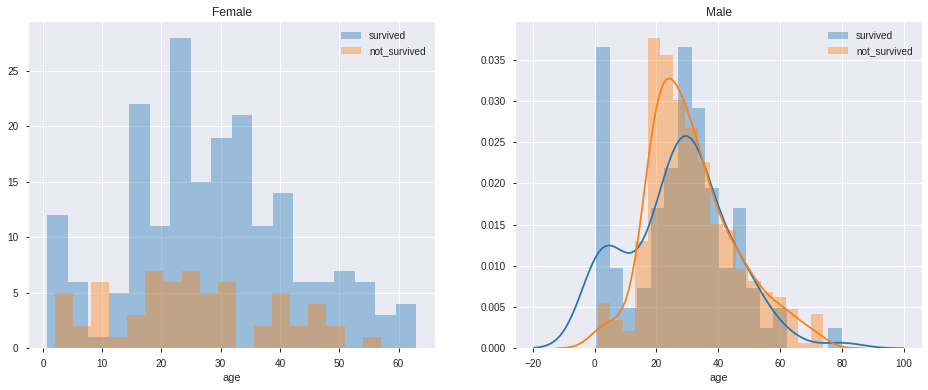

In [9]:
import matplotlib.pyplot as plt
survived='survived'
not_survived='not_survived'

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(16,6))
women=titanic[titanic['sex']=='female']
men=titanic[titanic['sex']=='male']
 
ax=sns.distplot(women[women[survived]==1].age.dropna(),
               bins=18,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women[survived]==0].age.dropna(),
               bins=18,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')

ax=sns.distplot(men[men[survived]==1].age.dropna(),
               bins=18,label=survived,ax=axes[1],kde=True)
ax=sns.distplot(men[men[survived]==0].age.dropna(),
               bins=18,label=not_survived,ax=axes[1],kde=True)
ax.legend()
ax.set_title('Male')

In [10]:
titanic[titanic['pclass']==1]['age'].mean()

38.233440860215055

In [11]:
titanic[titanic['pclass']==2]['age'].mean()

29.87763005780347

In [12]:
titanic[titanic['pclass']==3]['age'].mean()

25.14061971830986

In [13]:
def imput_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return titanic[titanic['pclass']==1]['age'].mean()
        elif pclass==2:
            return titanic[titanic['pclass']==2]['age'].mean()
        elif pclass==3:
            return titanic[titanic['pclass']==3]['age'].mean()
    else:
        
        return age

In [14]:
titanic['age']=titanic[['age','pclass']].apply(imput_age,axis=1)

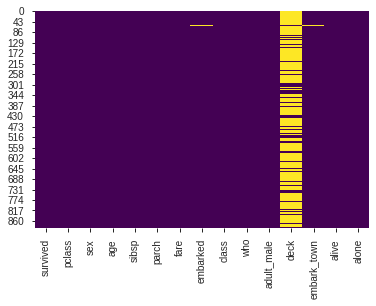

In [15]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [16]:
titanic['embarked'].isnull().sum()

2

In [17]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [18]:
Common_value='S'
titanic['embarked'].fillna(Common_value,inplace=True)

In [19]:
titanic['embarked'].isnull().sum()

0

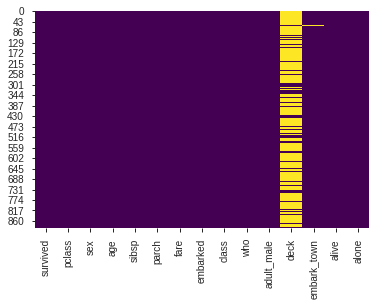

In [20]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [21]:
titanic.drop(labels=['deck','embark_town','alive'],inplace=True,axis=1)

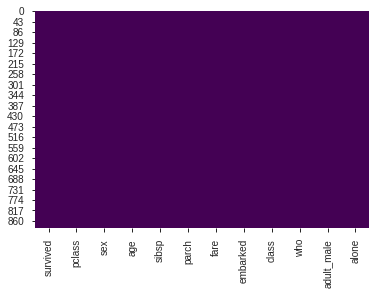

In [22]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [23]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [24]:
##converted categorical data into numerical data
gender={'male':0,'female':1}
titanic['sex']=titanic['sex'].map(gender)

In [25]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,False


In [26]:
who={'man':0,'women':1,'child':2}
titanic['who']=titanic['who'].map(gender)

In [27]:
adult_male={True:1,False:0}
titanic['adult_male']=titanic['adult_male'].map(adult_male)

In [28]:
alone={True:1,False:0}
titanic['alone']=titanic['alone'].map(alone)

In [29]:
ports={'S':0,'C':1,'Q':2}
titanic['embarked']=titanic['embarked'].map(ports)

In [30]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,0,Third,NaN,1,0
1,1,1,1,38.0,1,0,71.2833,1,First,NaN,0,0
2,1,3,1,26.0,0,0,7.9250,0,Third,NaN,0,1
3,1,1,1,35.0,1,0,53.1000,0,First,NaN,0,0
4,0,3,0,35.0,0,0,8.0500,0,Third,NaN,1,1


In [31]:
titanic['fare']=titanic['fare'].astype('int')
titanic['age']=titanic['age'].astype('int')
titanic['class']=titanic['pclass'].astype('int')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    int64  
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    int64  
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         0 non-null      float64
 10  adult_male  891 non-null    int64  
 11  alone       891 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 83.7 KB


In [32]:
clas={'First':0,'Second':1,'Third':2}
titanic['class']=titanic['class'].map(clas)

In [33]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,NaN,NaN,1,0
1,1,1,1,38,1,0,71,1,NaN,NaN,0,0
2,1,3,1,26,0,0,7,0,NaN,NaN,0,1
3,1,1,1,35,1,0,53,0,NaN,NaN,0,0
4,0,3,0,35,0,0,8,0,NaN,NaN,1,1


In [34]:
titanic.drop(labels=['class','who'],axis=1,inplace=True)

In [35]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0


In [36]:
from sklearn.model_selection import train_test_split
x=titanic.drop('survived',axis=1)
y=titanic['survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(668, 9)
(668,)
(223, 9)
(223,)


In [38]:
# A simple average ensemble model
from sklearn.naive_bayes import BernoulliNB
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(kernel='rbf',probability=True)
model4 = BernoulliNB()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [39]:
# lets look at the accuracy for each model
score1=model1.score(x_test,y_test)
print(score1)

0.7982062780269058


In [40]:
# lets look at the accuracy for each model
score2=model2.score(x_test,y_test)
print(score2)

0.6905829596412556


In [41]:
# lets look at the accuracy for each model
score3=model3.score(x_test,y_test)
print(score3)

0.6322869955156951


In [42]:
# lets look at the accuracy for each model
score4=model4.score(x_test,y_test)
print(score4)

0.757847533632287


In [43]:
# prediciton process
pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)
pred4=model4.predict(x_test)

In [45]:
print(pred1)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0
 0]


In [46]:
print(pred2)

[1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0]


In [47]:
print(pred3)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0]


In [48]:
print(pred4)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 0]


In [52]:
final_pred=np.array([])
for i in range(0,len(x_test)):
    final_pred=np.append(final_pred,stat.mode([pred1[i],
                                              pred2[i],
                                              pred3[i]]))
final_pred

array([1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0.])